# EC2202 Linked Lists

In [ ]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/GENVJt4ViaQ" title="YouTube video player" frameborder="0" allowfullscreen></iframe>

**Disclaimer.**
This code examples are based on

1. [KAIST CS206 (Professor Otfried Cheong)](https://otfried.org/courses/cs206/)
2. [LeetCode](https://leetcode.com/)
3. Coding Interviews

In [ ]:
import doctest
import time

### Q4. Spiral matrix

[Amazon] Given an m x n matrix, return all elements of the matrix in spiral order.
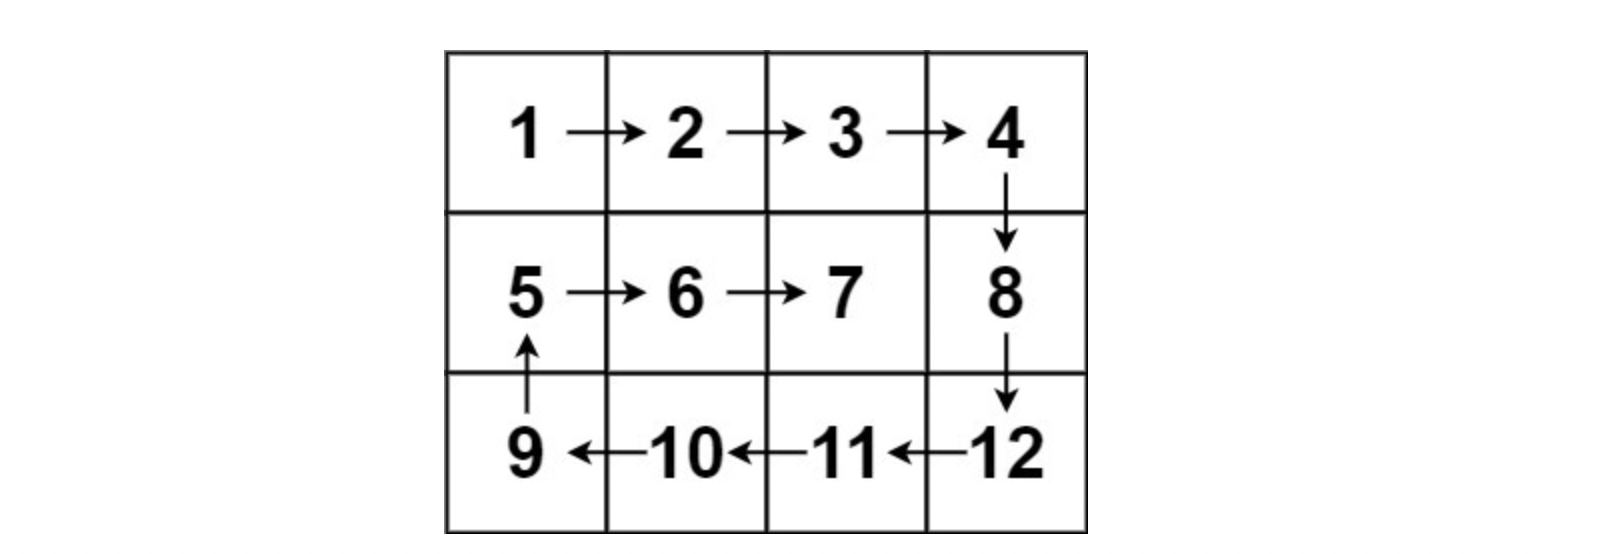

In [ ]:
def spiral_array(array):
  '''
  return all elements of 2D matrix in the spiral order

  >>> matrix = [[1,  2,  3,  4],
  ...           [5,  6,  7,  8],
  ...           [9, 10, 11, 12]]
  >>> spiral_array(matrix)
  [1, 2, 3, 4, 8, 12, 11, 10, 9, 5, 6, 7]
  >>> matrix = [[ 1,  2,  3,  4,  5,  6],
  ...           [ 7,  8,  9, 10, 11, 12],
  ...           [13, 14, 15, 16, 17, 18]]
  >>> spiral_array(matrix)
  [1, 2, 3, 4, 5, 6, 12, 18, 17, 16, 15, 14, 13, 7, 8, 9, 10, 11]
  '''
  result = []

  while array:
    # first move: from left to right at the top side
    result += array.pop(0)

    # second move: from top to bottom at the right side
    if array: # and array[0]:
      for row in array:
        result.append(row.pop())

    # third move: from right to left at the bottom side
    if array:
      result += array.pop()[::-1]  # OR array.pop().reverse()

    # fourth move: from bottom to top at the left side
    if array and array[0]:
      for row in array[::-1]:
        result.append(row.pop(0))

  return result

In [ ]:
def spiral_array(array):
  result = []

  while array: # left -> right
    result += array.pop()

    if array: # top -> bottom
      for row in array:
        result.append(row.pop())

    if array: # right -> left
      result += array.pop()[::-1]

    if array and array[0]: # bottom -> top
      for row in array[::-1]:
        result.append(row.pop(0))

  return result

In [ ]:
def spiral_array(array):
  result = []

  while array: # left -> right
    result += array.pop()

    if array: # top -> bottom
      for row in array:
        result.append(row.pop())

    if array: # right -> left
      result += array.pop()[::-1]

    if array and array[0]: # left -> right
      for row in array[::-1]:
        result.append(row.pop(0))

  return result

In [ ]:
doctest.run_docstring_examples(spiral_array, globals(), False, __name__)

## A Basic Idea

We need a small node object that stores an element, and also links to another node object

In [ ]:
class Node:
  def __init__(self, el, next=None):
    self.el = el
    self.next = next

  def __str__(self):
    return "<" + str(self.el) + ">"

In [ ]:
class Node:
  def __init__(self, el, next = None):
    self.el = el
    self.next = next

  def __str__(self):
    return "<" + str(self.el) + ">"

In [ ]:
class Node:
  def __init__(self, el, next = None):
    self.el = el
    self.next = next

  def __str__(self):
    return "<" +str(self.el) + ">"

In [ ]:
a = Node("red")
b = Node("orange", a)
c = Node("yellow", b)
print(a)
print(b)
print(c)
print(a.next)
print(b.next)
print(c.next)

# c(yellow) - b(orange) - a(red)

<red>
<orange>
<yellow>
None
<red>
<orange>


In [ ]:
a = Node("apples")
a = Node("oranges", a) # orange is at the front of apples
a = Node("strawberries", a) # straberries is at front , orange, apple, none
print(a) # straberries
print(a.next) # oranges
print(a.next.next) # apples
print(a.next.next.next is None)

<strawberries>
<oranges>
<apples>
True


Let’s write a function that will display all the elements of a list. One approach is to do it recursively:

In [ ]:
def display(a):  # recursive => function calls -> memory problem.
  if a is not None:  # the list has not reached the end!
    print(a.el)
    display(a.next)

# memory problem 생각. iteration으로 implementation 하는게 더 좋음

def display(a):
  while a is not None:
    print(a.el)
    a = a.next

display(a)

strawberries
oranges
apples


In [ ]:
display(a)

strawberries
oranges
apples


It is natural to use recursive functions to work with linked lists, since linked lists can be defined recursively: a linked list is either empty (that is, `None`), or consists of a `Node` whose `next` field points to a linked list.

With this function, we wouldn’t be able to display a linked list with more than 1000 elements—that’s not a lot (we'll cover why this happens in the **'Stack'** class.

Let’s solve the problem by rewriting the function using a loop, without recursion:

In [ ]:
def display(a):
  while a is not None:
    print(a.el)
    a = a.next

### 'ppp' Exercise

Can you implement a function that creates a linked list from a sequence of items?

In [ ]:
def create_linked_list(input_list):
  '''
  creates a linked list from a sequence of items
  >>> test_ll = create_linked_list([1, 2, 3, 4, 5])
  >>> display(test_ll)
  1
  2
  3
  4
  5
  '''
  # solution 1. scanning items from the back
  head = None
  for item in input_list[::-1]:
    # scan item from the back; reverse
    # this might not be supportable in other languages
    head = Node(item, head)
  return head

  # solution 2. scan items from the start
  head = None # initiate head as None
  for item in input_list:
    if head is None:
      head = Node(item) # add new item
    else:
      # move to the tail
      current_node = head
      while current_node.next:
        current_node = current_node.next
      current_node.next = Node(item)
  return head
  # not efficient; O(N)^2

  # solution 3. scan items from the start but more efficiently
  head, tail = None, None
  for item in input_list:
    if head is None:
      head = Node(item)
      tail = head # if just only one item
    else:
      tail.next = Node(item) # creating new node at the next position of the current tail
      tail = tail.next
  return head

In [ ]:
test_ll = create_linked_list([1, 2, 3, 4, 5])
display(test_ll)

## A LinkedList Class

In [ ]:
class LinkedList:
  def __init__(self, items = None):
    self._front = None # store front node
    # semi-priv attribute. more preferable to ensure encapsulation; compared to self.head = None
    if items:
      for item in items:
        self.append(item) # if items are given, add at the end with .append method

  def front(self): # offer method that returns _front, to use semi-private attribute in line 3
    return self._front

  def is_empty(self): # checking if the linked list is empty or not
    return self._front is None

  def __repr__(self): # repr from last lectures. (c.f. last lec.)
    if self.is_empty():
      return "[ ]"
    res = "["
    p = self._front
    while p is not None:
      res += repr(p.el)
      if p.next is not None:
        res += ", "
      p = p.next
    res += "]"
    return res

  # ppp exercise
  def prepend(self, el):
    #         self._front -> next -> ...
    #   el -> self._front -> next -> ... :: add new item(el) at the front
    self._front = Node(el, self._front) # how: update front with new node

  # ppp exercise
  def append(self, item):
      # self._front -> ... -> last_item
      # self._front -> ... -> last_item -> item
      if self.is_empty():
        self._front = Node(item)
      else:
     #   p = self._front
     #  while p.next != None:
     #     p = p.next
     #   p.next = Node(item)
        p = self.last()
        p.next = Node(item)
      self._count += 1

  def last(self):
    p = self._front
    while p.next != None:
      p = p.next
    return p

  def __len__(self):
    if self.is_empty():
      return 0
    p = self._front
    count = 0
    while p is not None:
      count += 1
      p = p.next
    return count

  def remove_first(self):
    # self._front -> next -> ...
    #                next -> ...
    self._front = self._front.next

The linked list we have implemented is not convenient to use. In this section, we will implement a class that handles all the gory chores under the hood.

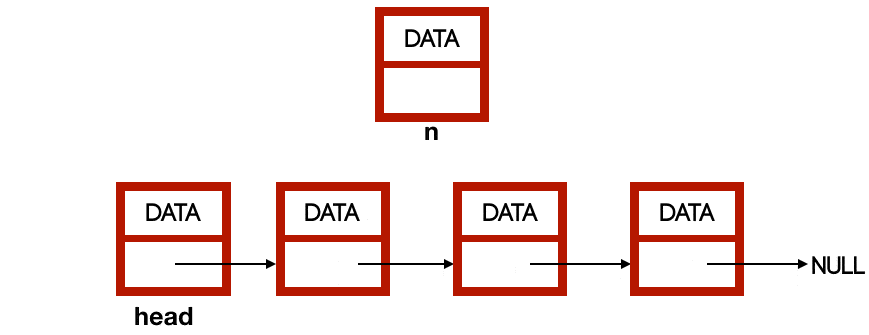

In [ ]:
class EmptyListError(Exception):
  pass

class LinkedList:
  # constructor creates an empty list
  def __init__(self, items=None):
    # stores only a reference to the first element of the list
    self._front = None
    # self.head = None  # <- no need of def first(self)
    if items:
      for item in items:
        self.append(item)

  # returns the front node
  def first(self):
    # if self._front is None:
    #   raise EmptyListError
    return self._front

  # checks if the list is empty
  def is_empty(self):
    return self._front is None

  # nicely-formatted LL representation
  def __repr__(self):
    if self.is_empty():
      return "[]"
    res = "["
    p = self._front
    while p is not None:
      res += repr(p.el)
      if p.next is not None:
        res += ", "
      p = p.next
    res += "]"
    return res

  # adds a new node at the front
  def prepend(self, el):
    #       self._front -> next -> ...
    # el -> self._front -> next -> ...
    self._front = Node(el, self._front)

  # add an item at the end
  # 'ppp' exercise
  def append(self, el):
    pass

  # returns the last node
  def last(self):
    p = self._front
    while p.next != None:
      p = p.next
    return p

  # walk through the list and count node objects
  def __len__(self):
    if self.is_empty():
      return 0
    p = self._front
    count = 0
    while p is not None:
      count += 1
      p = p.next
    return count

  # removes the front node: just remove the connection!
  def remove_first(self):
    # self._front -> next -> ...
    #                next -> ...
    if self._front is None:
      raise EmptyListError
    self._front = self._front.next

  # optional
  # inserts a new node into the linked list
  # just after the given node n
  def insert_after(self, n, el):
    n.next = Node(el, n.next)

  # optional
  # deletes the node after node n
  def remove_after(self, n):
    if n.next is None:
      raise ValueError(n)
    n.next = n.next.next

  # returns the node just before the given node n
  def before(self, n):
    p = self._front
    while p.next != n:
      p = p.next
    return p

  # iterator
  def __iter__(self):
    node = self._front
    while node:
      yield node.el
      node = node.next

In [ ]:
ll = LinkedList()
ll.append(5)
ll.prepend(23)
ll.prepend(7)
print(ll)
print(ll.last())
print(ll.first())
ll.remove_first()
print('after removing the first element')
print(ll)
print(len(ll))
ll.append(1)
print('after inserting 1 to the back')
print(ll)
print(len(ll))
print('iteration')
for item in ll:
  print(item)

[7, 23, 5]
<5>
<7>
after removing the first element
[23, 5]
2
after inserting 1 to the back
[23, 5, 1]
3
iteration
23
5
1


### 'ppp' Exercise

Detect a loop in linked lists

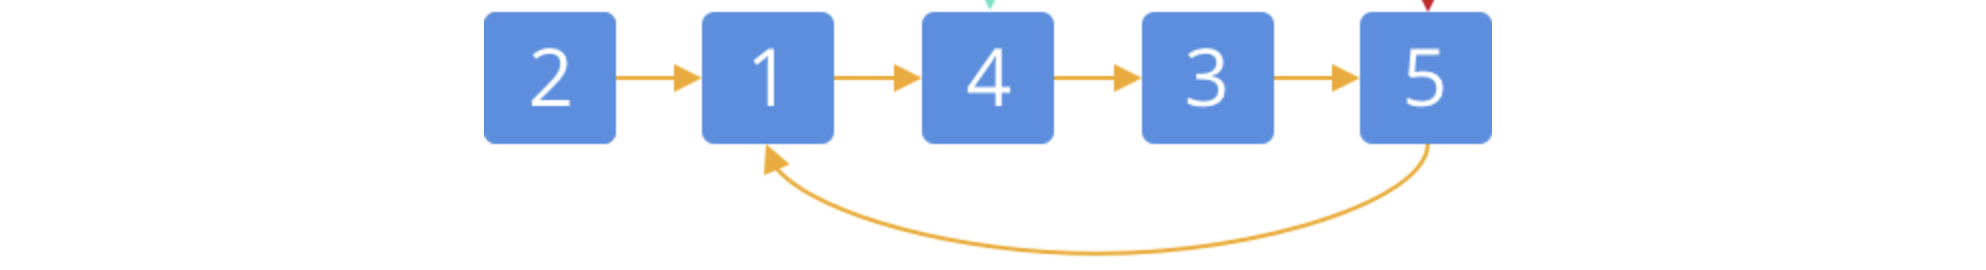

In [ ]:
def is_circular(linked_list):
  """
  determine wether the Linked List is circular or not

  >>> list_with_loop = LinkedList([2, -1, 3, 0, 5])
  >>> loop_start = list_with_loop.first().next
  >>> node = list_with_loop.first()
  >>> while node.next:
  ...   node = node.next
  >>> node.next = loop_start
  >>> is_circular(list_with_loop)
  True
  >>> small_loop = LinkedList([0])
  >>> small_loop.first().next = small_loop.first()
  >>> is_circular(small_loop)
  True
  >>> is_circular(LinkedList([-4, 7, 2, 5, -1]))
  False
  >>> is_circular(LinkedList([1]))
  False
  >>> is_circular(LinkedList([]))
  False
  """

In [ ]:
doctest.run_docstring_examples(is_circular, globals(), False, __name__)

## A DoublyLinkedList Class

Our linked list implementation is more powerful than the default Python list. However, it takes O(N) to append an item at the end. Furthermore, we want to conduct both forward and backward searches. For this, we are going to implement doubly linked lists where nodes are connected in both forward and backward directions :)

1. keep track of the tail node
2. enable both forward and backward travels

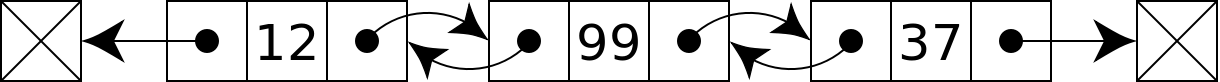

In [ ]:
class Node:
  def __init__(self, el, next=None, prev=None):
    self.el = el
    self.next = next
    self.prev = prev

  def __repr__(self):
    return "Node(" + repr(self.el) + ")"

# OR

  def __str__(self):
    return "<" + str(self.el) + ">"

Here is our first attempt to implement a doubly linked list:

In [ ]:
class DoublyLinkedList:
  def __init__(self, items=None):
      self._front = None  # self.head = None
      self._rear = None   # last item
      if items:
        for item in items:
          self.append(item)

  def front(self):
    return self._front

  def is_empty(self):
    return self._front is None

  # ppp exercise
  def prepend(self, el):
      #       self._front -> next -> ...
      # el -> self._front -> next -> ...

      # self._front = Node(el, self._front)

      if self.is_empty():
        self._front = Node(el)
        self._rear = self._front # if only one item, front = rear
      else:
        # when there is more than one item
        new_node = Node(el, next=self._front) # first, create a new node
        self._front.prev = new_node # new node will be the current front
        self._front = new_node # update new_node as 'new' front

  # ppp exercise
  def append(self, item):
    # self._front -> ... -> self._rear
    # self._front -> ... -> self._rear -> new_node
    if self.is_empty():
      self.prepend(item)
    else:
      new_node = Node(item, prev=self._rear) # create a new node
      self._rear.next = new_node # new node will be the current last
      self._rear = new_node # update new_node as 'new' rear


In [ ]:
DLL = DoublyLinkedList()
DLL.prepend(5)
print('DLL:', DLL)
print("first and last: ", DLL.first(), DLL.last(), len(DLL))
print()
DLL.append(6)
DLL.append(7)
DLL.prepend(8)
print('DLL:', DLL)
print("first and last: ", DLL.first(), DLL.last(), len(DLL))
print()
DLL.append(9)
print('DLL:', DLL)
print("first and last: ", DLL.first(), DLL.last(), len(DLL))
print()

DLL.prepend(4)
print('DLL:', DLL)
print("first and last: ", DLL.first(), DLL.last(), len(DLL))
print()

DLL: [5]
first and last:  Node(5) Node(5) 1

DLL: [8, 5, 6, 7]
first and last:  Node(8) Node(7) 4

DLL: [8, 5, 6, 7, 9]
first and last:  Node(8) Node(9) 5

DLL: [4, 8, 5, 6, 7, 9]
first and last:  Node(4) Node(9) 6



Our first implementation works fine. Nonetheless, it checks special cases quite a lot. We can resolve this issue and simplify our implementation by employing sentinel nodes. We create two dummy nodes as sentinel nodes and they do not contain meaningful data. Although sentinel nodes get placed at the front and the rear, the real first and last elements need to get accessed by

* `sentinel_front.next` and
* `sentinel_rear.prev`

In summary,
- Sentinel nodes = Dummy nodes
  - sentinel_front -> sentinel_back
  - sentinel_front -> new_item -> sentinel_back

In [ ]:
class DoublyLinkedList:
  def __init__(self):
    self._front = Node(None)
    self._rear = Node(None, prev=self._front)
    self._front.next = self._rear

  def is_empty(self):
    return self._front.next is self._rear

  def first(self):
    if self.is_empty():
      raise EmptyListError
    return self._front.next

  def last(self):
    if self.is_empty():
      raise EmptyListError
    return self._rear.prev

  def __repr__(self):
    res = "["
    p = self._front.next
    while p != self._rear:
      res += str(p.el)
      if p.next != self._rear:
        res += ", "
      p = p.next
    res += "]"
    return res

  def __len__(self):
    p = self._front.next
    count = 0
    while p != self._rear:
      count += 1
      p = p.next
    return count

  def insert_after(self, n, el):
    # n    ->    n.next
    # n -> el -> n.next
    p = Node(el, n.next, n)
    n.next.prev = p
    n.next = p

  def prepend(self, el):
    # self._front       ->       next -> ...
    # self._front -> new_node -> next -> ...

    # don't have to care about is_empty
    new_node = Node(item, prev=self._front, next=self._front.next)
    self._front.next.prev = new_node
    self._front.next = new_node

    # self.insert_after(self._front, el)

  def append(self, el):
    self.insert_after(self._rear.prev, el)

  def remove(self, n):
    n.prev.next = n.next
    n.next.prev = n.prev

In [ ]:
DLL = DoublyLinkedList()
DLL.prepend(5)
print('DLL:', DLL)
print("first and last: ", DLL.first(), DLL.last(), len(DLL))
print()
DLL.append(6)
DLL.append(7)
DLL.prepend(8)
print('DLL:', DLL)
print("first and last: ", DLL.first(), DLL.last(), len(DLL))
print()
DLL.append(9)
print('DLL:', DLL)
print("first and last: ", DLL.first(), DLL.last(), len(DLL))
print()

DLL.prepend(4)
print('DLL:', DLL)
print("first and last: ", DLL.first(), DLL.last(), len(DLL))
print()

DLL: [5]
first and last:  Node(5) Node(5) 1

DLL: [8, 5, 6, 7]
first and last:  Node(8) Node(7) 4

DLL: [8, 5, 6, 7, 9]
first and last:  Node(8) Node(9) 5

DLL: [4, 8, 5, 6, 7, 9]
first and last:  Node(4) Node(9) 6



## 'ppp' Exercises

### Q1. Add two numbers

[Qualcomm] Given two non-empty linked lists representing two non-negative integers where the digits are stored in reverse order and each of their nodes containing a single digit, add the two numbers and return the sum as a linked list.

In [ ]:
def add_nums(self, ll_first, ll_second):
  '''
  >>> ll_1 = LinkedList([4, 7])
  >>> ll_2 = LinkedList([3, 4, 5])
  >>> print(add_nums(ll_1, ll_2))  # 74 + 543 = 617
  [6, 1, 7]
  >>> ll_1 = LinkedList([6, 3])
  >>> ll_2 = LinkedList([7])
  >>> print(add_nums(ll_1, ll_2))  # 36 + 7 = 43
  [4, 3]
  >>> ll_1 = LinkedList([9, 8, 7, 6, 5])
  >>> ll_2 = LinkedList([4, 3, 2, 1])
  >>> print(add_nums(ll_1, ll_2))  # 56789 + 1234 = 58023
  [5, 8, 0, 2, 3]
  '''
  result = []
  temp = dummy
  carry = 0
  while

In [ ]:
doctest.run_docstring_examples(add_nums, globals(), False, __name__)